# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
red_wine = pd.read_csv("./data/winequality-red.csv", sep=';')
white_wine = pd.read_csv("./data/winequality-white.csv", sep=';')

## Search for Duplicates and Missing Values

In [3]:
# Search for missing values
missing_red = red_wine.isnull().sum()
missing_white = white_wine.isnull().sum()

# Search for duplicates 
duplicates_red = red_wine.duplicated().sum()
duplicates_white = white_wine.duplicated().sum()

print(f"\nMissing values in red wine dataset:\n{missing_red[missing_red > 0]}")
print(f"\nMissing values in white wine dataset:\n{missing_white[missing_white > 0]}")

print(f"\nDuplicates in red wine dataset: {duplicates_red}")
print(f"\nDuplicates in white wine dataset: {duplicates_white}")


Missing values in red wine dataset:
Series([], dtype: int64)

Missing values in white wine dataset:
Series([], dtype: int64)

Duplicates in red wine dataset: 240

Duplicates in white wine dataset: 937


## Data summary

In [4]:
# Display basic information
print("RED WINE SUMMARY:")
print(red_wine.info())
print(red_wine.describe())

print("\nWHITE WINE SUMMARY:")
print(white_wine.info())
print(white_wine.describe())

# Merge datasets
merged_wine = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
print("\nMERGED DATA SUMMARY:")
print(merged_wine.info())
print(merged_wine.describe())

RED WINE SUMMARY:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.

## Feature Distribution Histograms

<Figure size 1200x500 with 0 Axes>

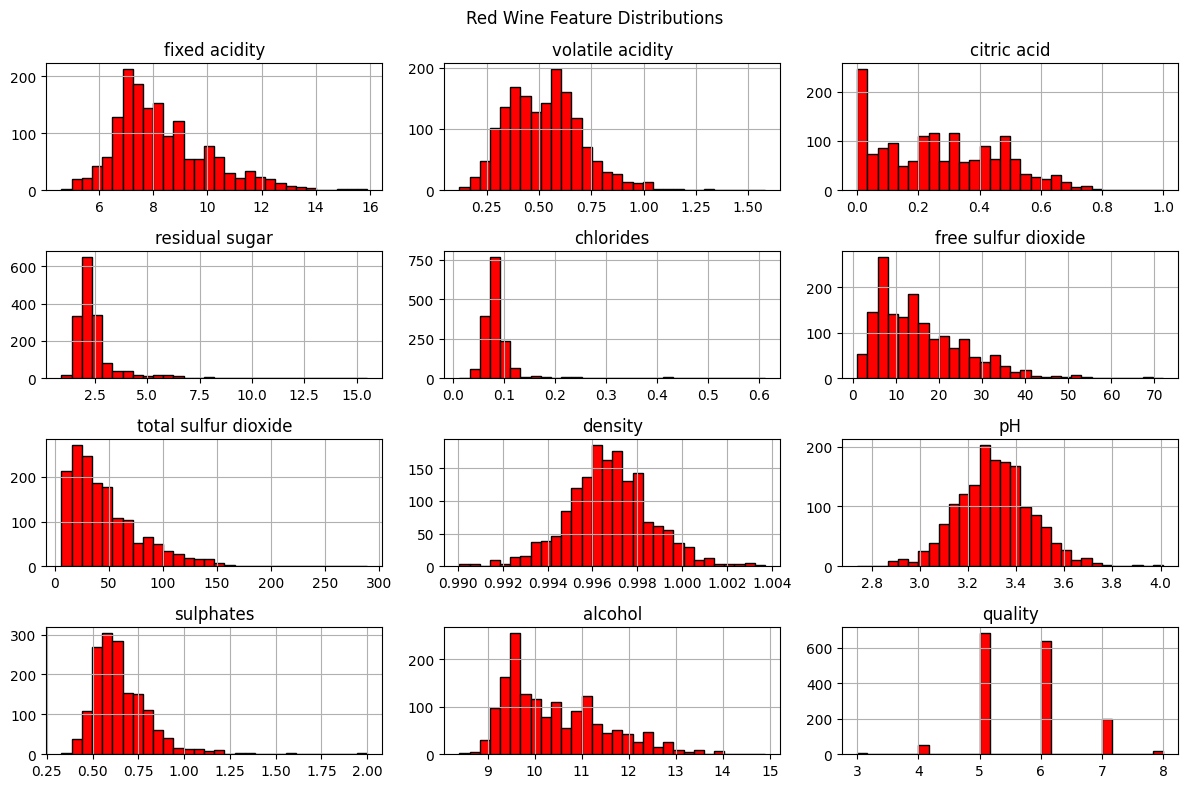

<Figure size 1200x500 with 0 Axes>

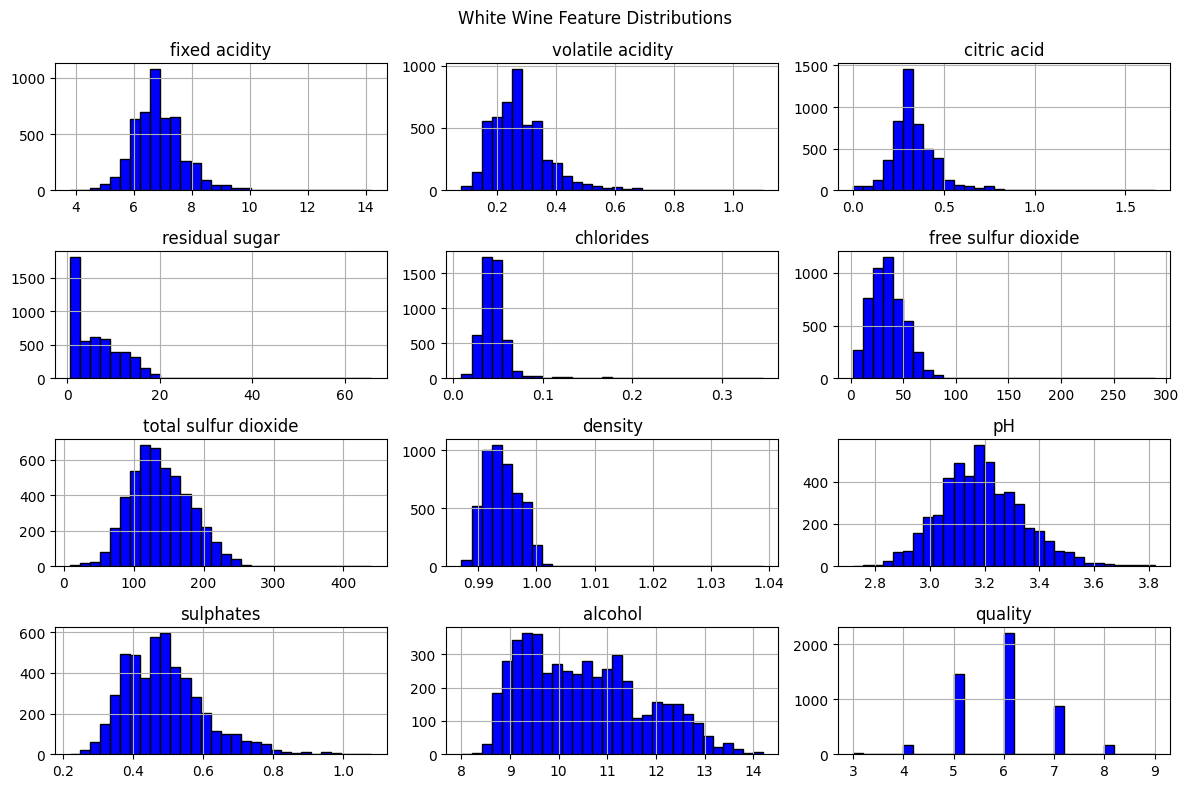

<Figure size 1200x500 with 0 Axes>

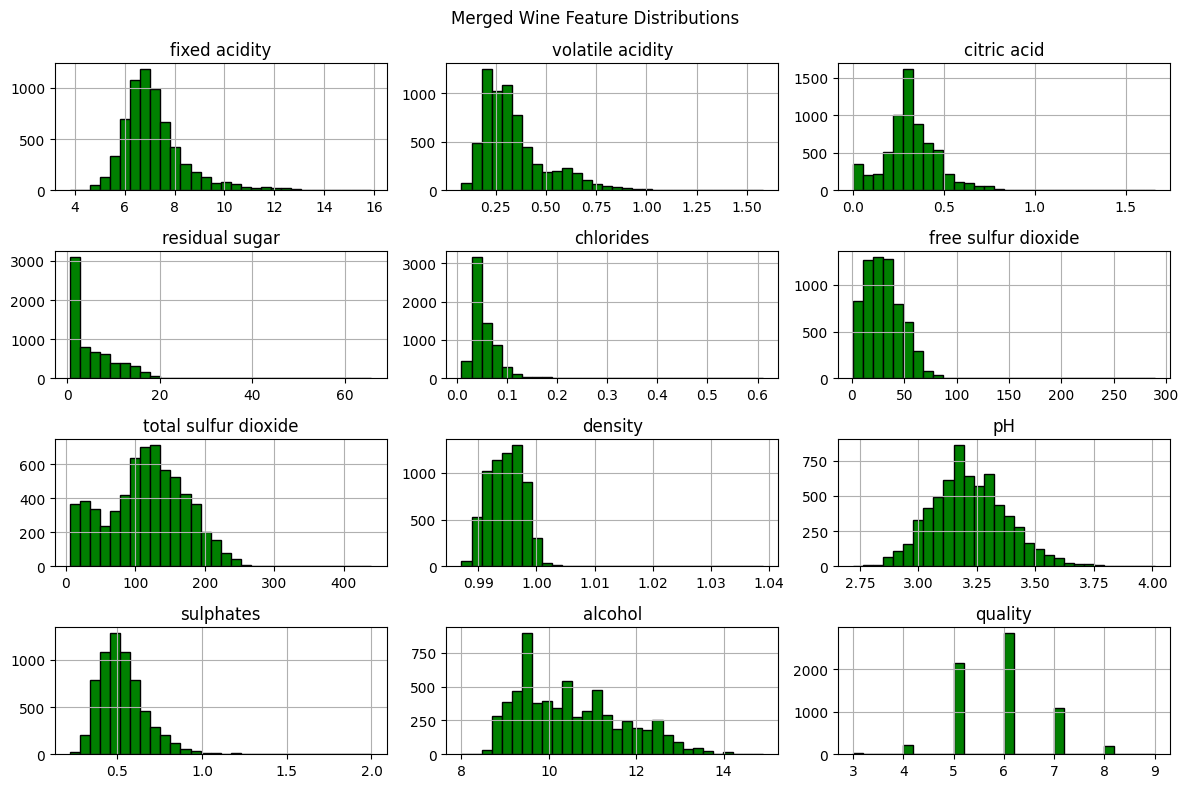

In [5]:
# Histogram for feature distributions
# RED
plt.figure(figsize=(12, 5))
red_wine.hist(bins=30, edgecolor='black', color='red', figsize=(12, 8))
plt.suptitle("Red Wine Feature Distributions")
plt.tight_layout()
plt.savefig("./figures/red_wine_histogram.png")
plt.show()

# WHITE
plt.figure(figsize=(12, 5))
white_wine.hist(bins=30, edgecolor='black', color='blue', figsize=(12, 8))
plt.suptitle("White Wine Feature Distributions")
plt.tight_layout()
plt.savefig("./figures/white_wine_histogram.png")
plt.show()

# MERGED
plt.figure(figsize=(12, 5))
merged_wine.hist(bins=30, edgecolor='black', color='green', figsize=(12, 8))
plt.suptitle("Merged Wine Feature Distributions")
plt.tight_layout()
plt.savefig("./figures/merged_wine_histogram.png")
plt.show()


## Box Plots for Outlier Detection

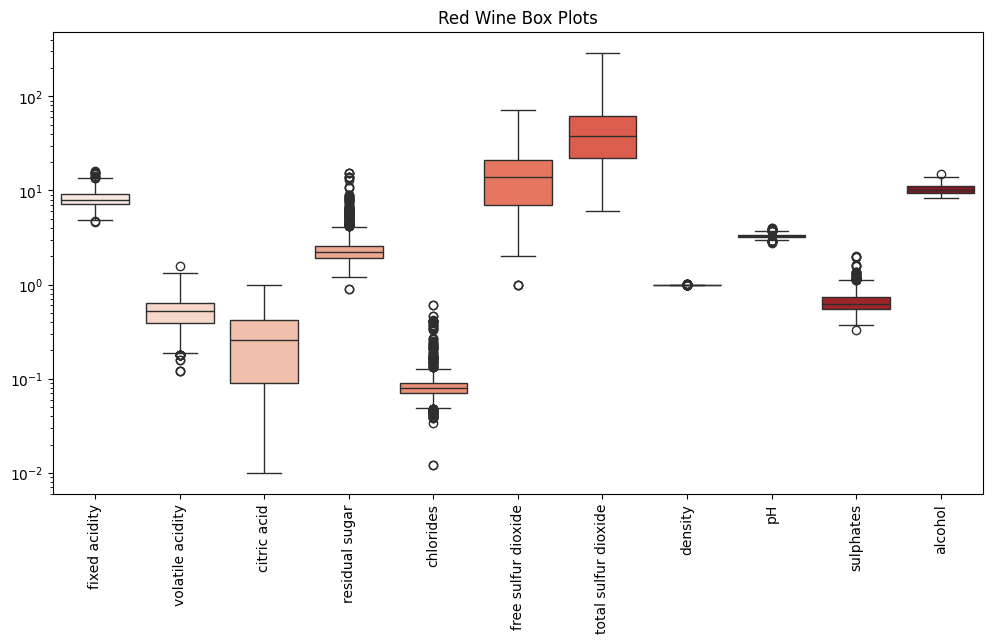

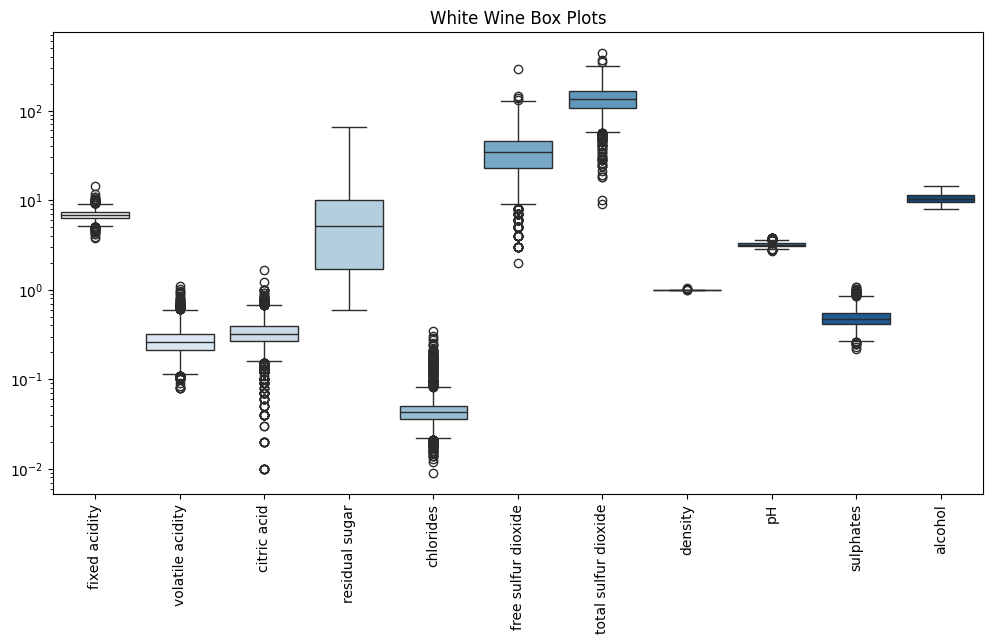

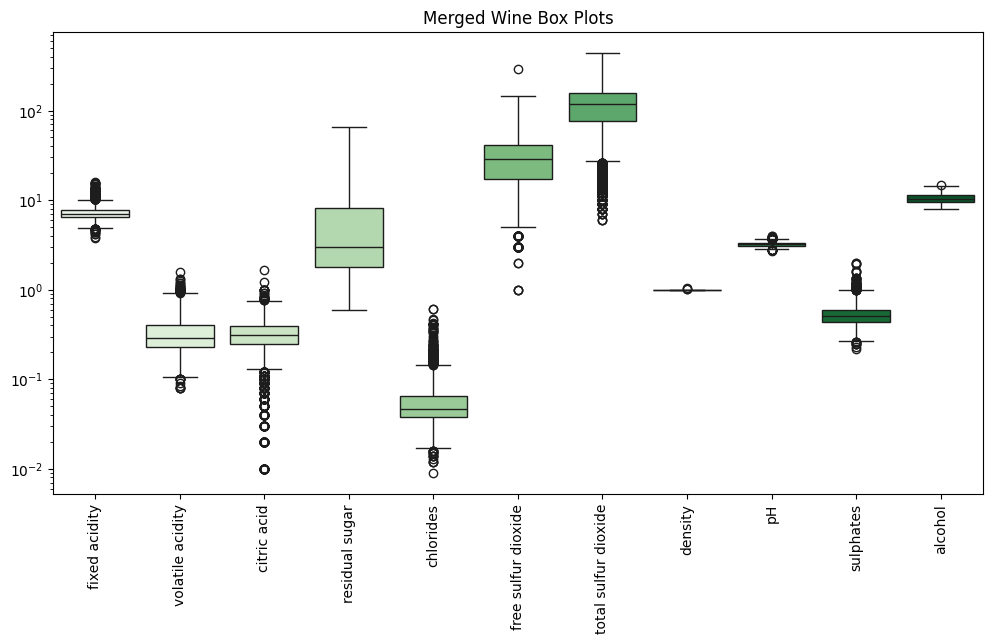

In [6]:
# Box plot for outlier detection
# RED
plt.figure(figsize=(12, 6))
sns.boxplot(data=red_wine.drop(columns=['quality']), palette='Reds', log_scale=True)
plt.xticks(rotation=90)
plt.title("Red Wine Box Plots")
plt.savefig("./figures/red_wine_boxplot.png")
plt.show()

# WHITE
plt.figure(figsize=(12, 6))
sns.boxplot(data=white_wine.drop(columns=['quality']), palette='Blues', log_scale=True)
plt.xticks(rotation=90)
plt.title("White Wine Box Plots")
plt.savefig("./figures/white_wine_boxplot.png")
plt.show()

# MERGED
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_wine.drop(columns=['quality']), palette='Greens', log_scale=True)
plt.xticks(rotation=90)
plt.title("Merged Wine Box Plots")
plt.savefig("./figures/merged_wine_boxplot.png")
plt.show()

## Correlation Heatmaps of Variables

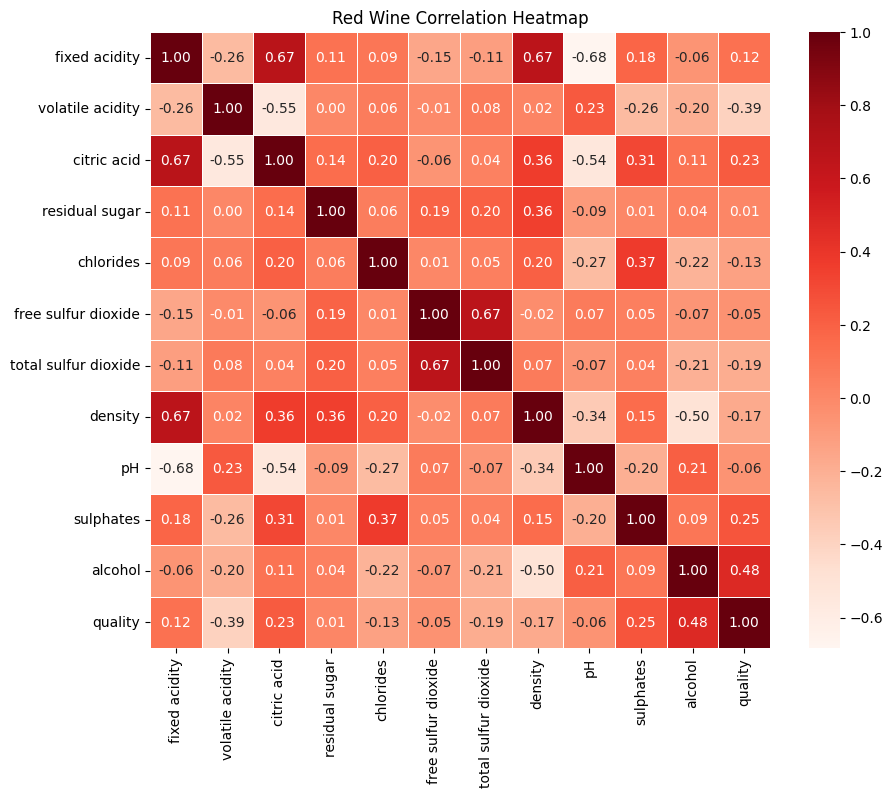

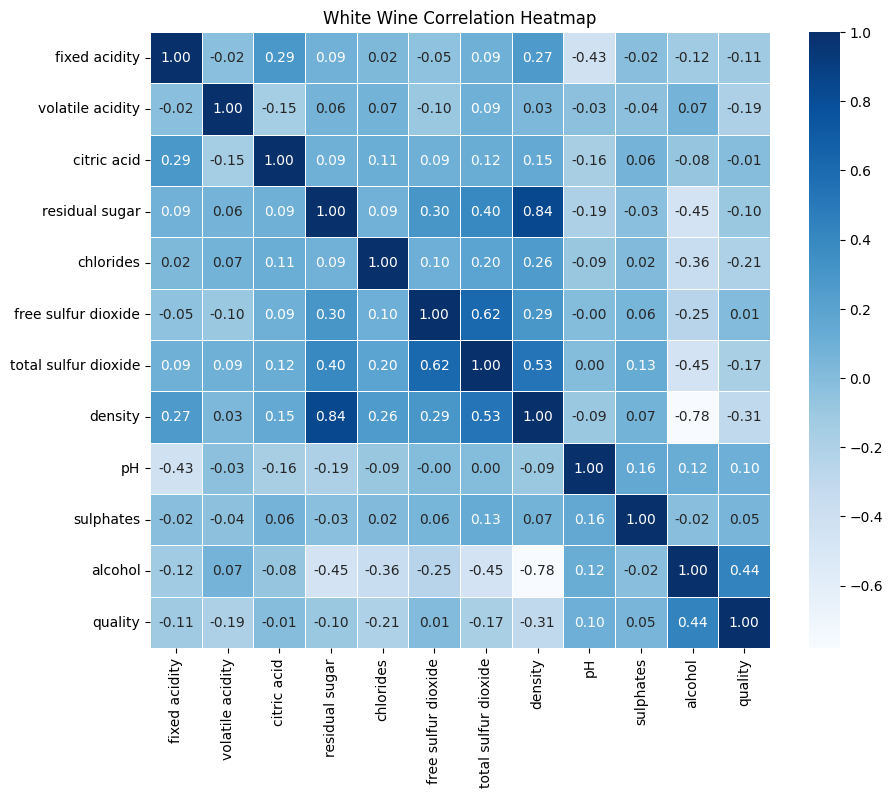

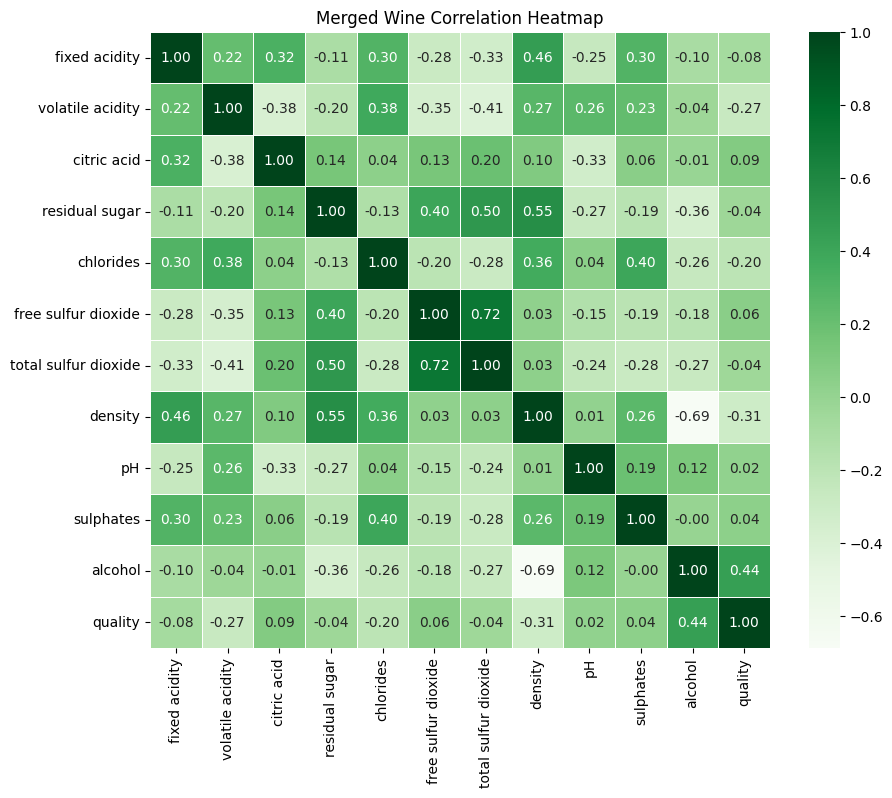

In [7]:
# Correlation heatmap for red wine
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Red Wine Correlation Heatmap")
plt.savefig("./figures/red_wine_correlation_heatmap.png")
plt.show()

# Correlation heatmap for white wine
plt.figure(figsize=(10, 8))
sns.heatmap(white_wine.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("White Wine Correlation Heatmap")
plt.savefig("./figures/white_wine_correlation_heatmap.png")
plt.show()

# Correlation heatmap for merged data
plt.figure(figsize=(10, 8))
sns.heatmap(merged_wine.corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Merged Wine Correlation Heatmap")
plt.savefig("./figures/merged_wine_correlation_heatmap.png")
plt.show()

## Pair Plots of Features

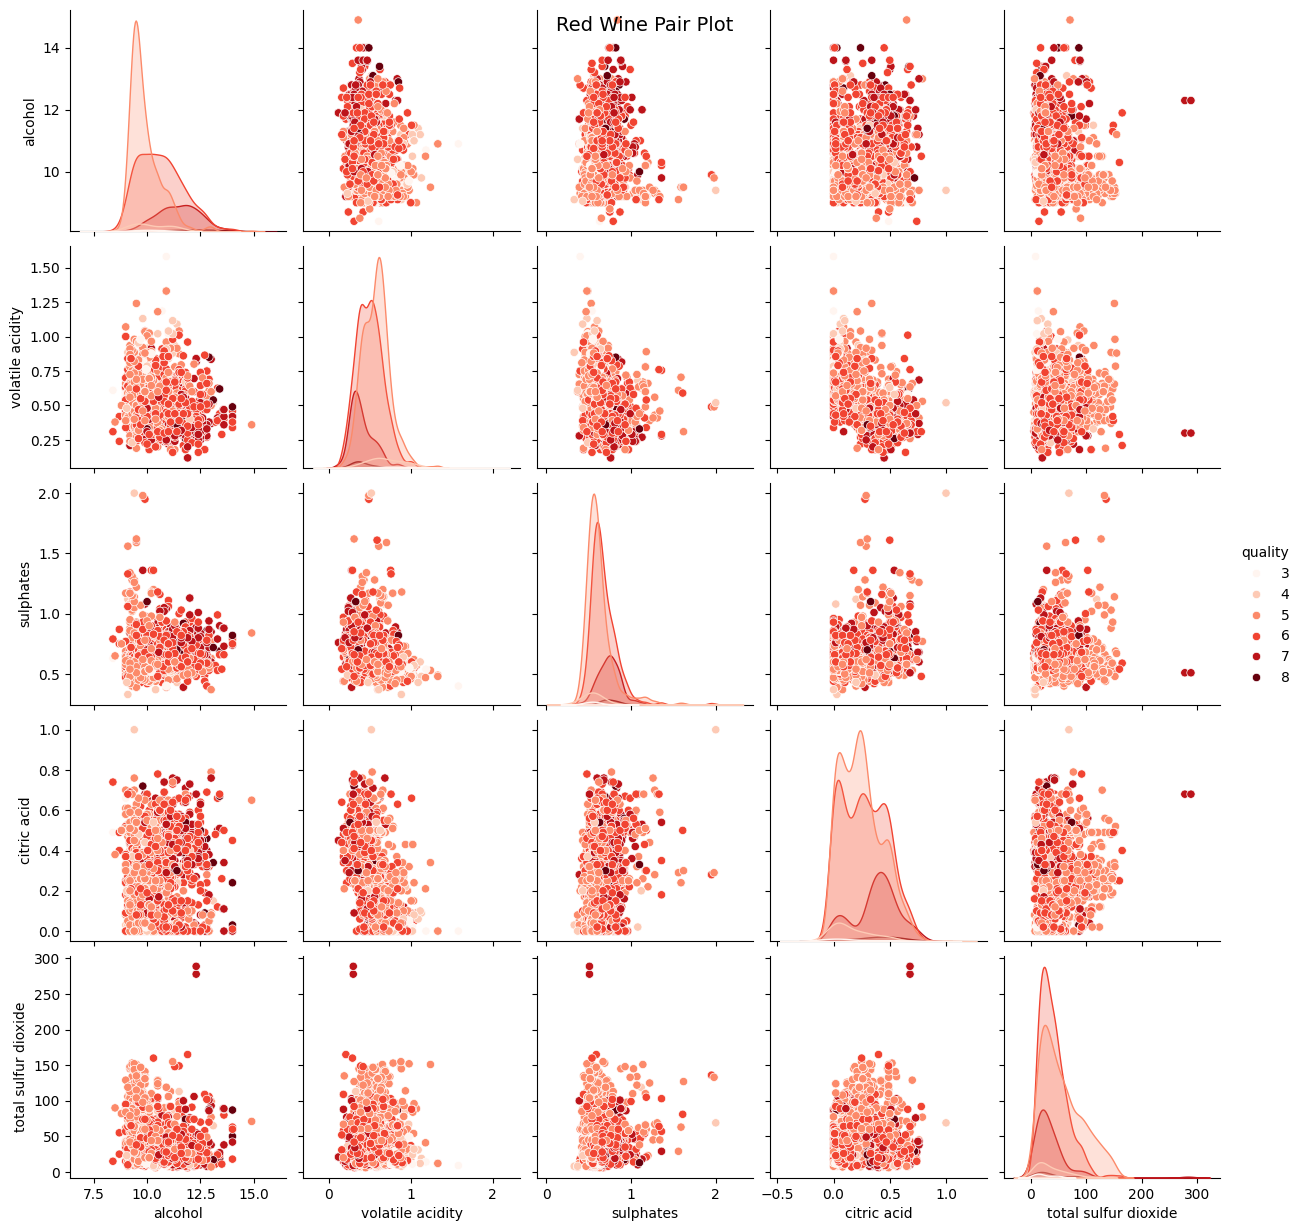

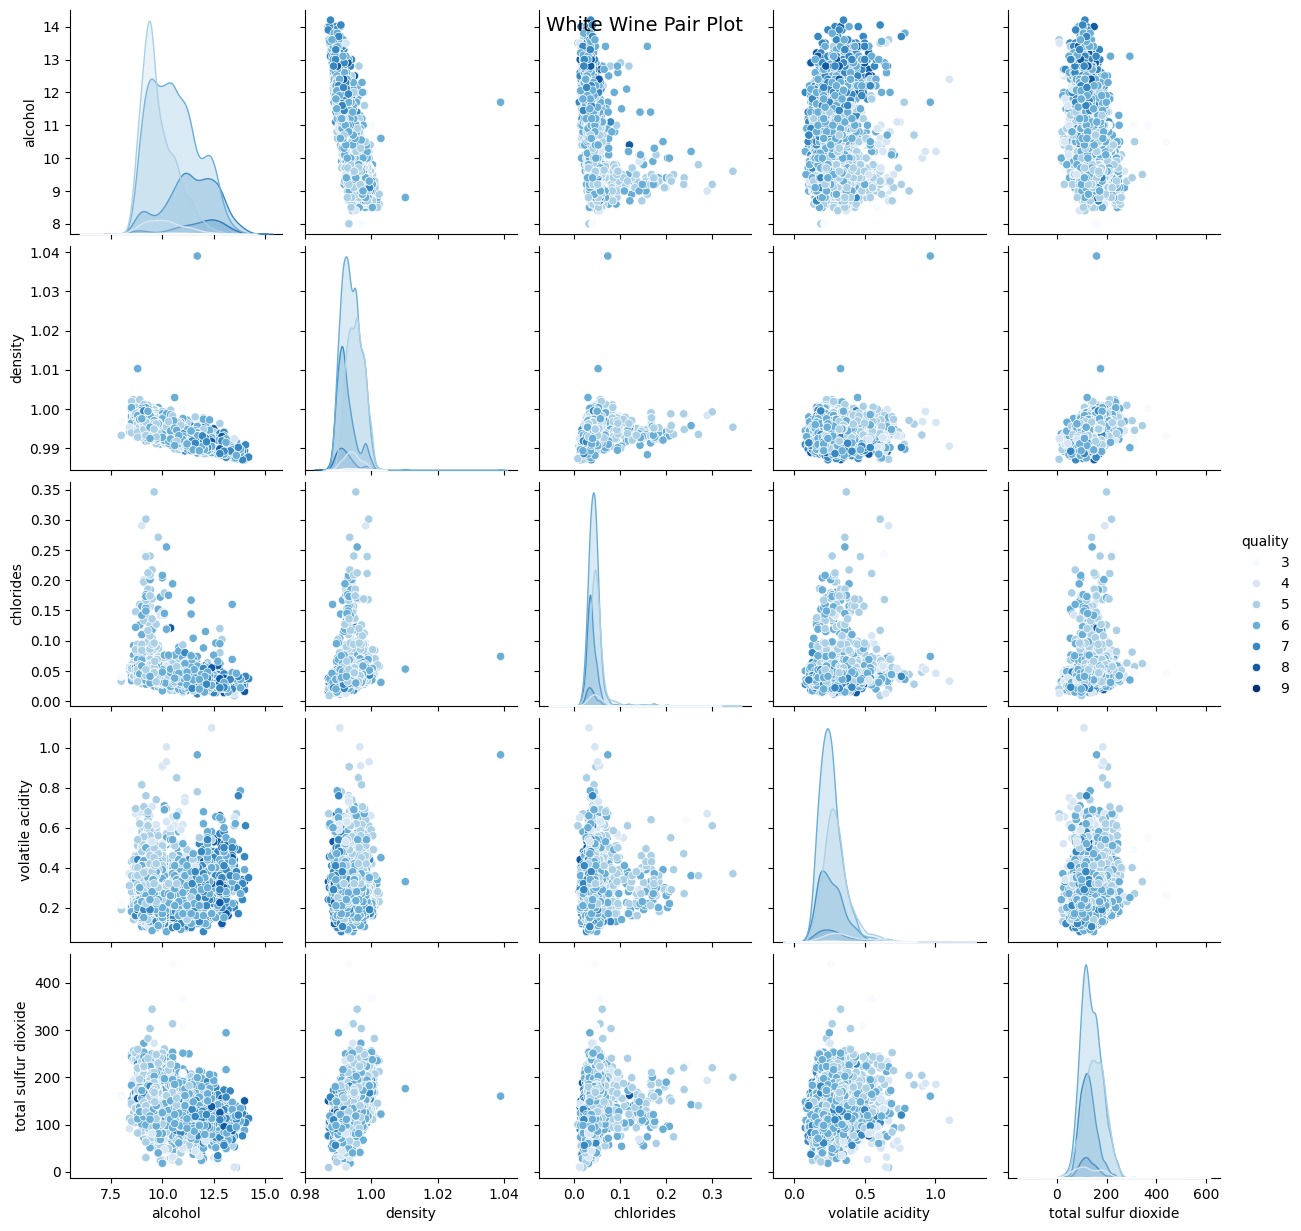

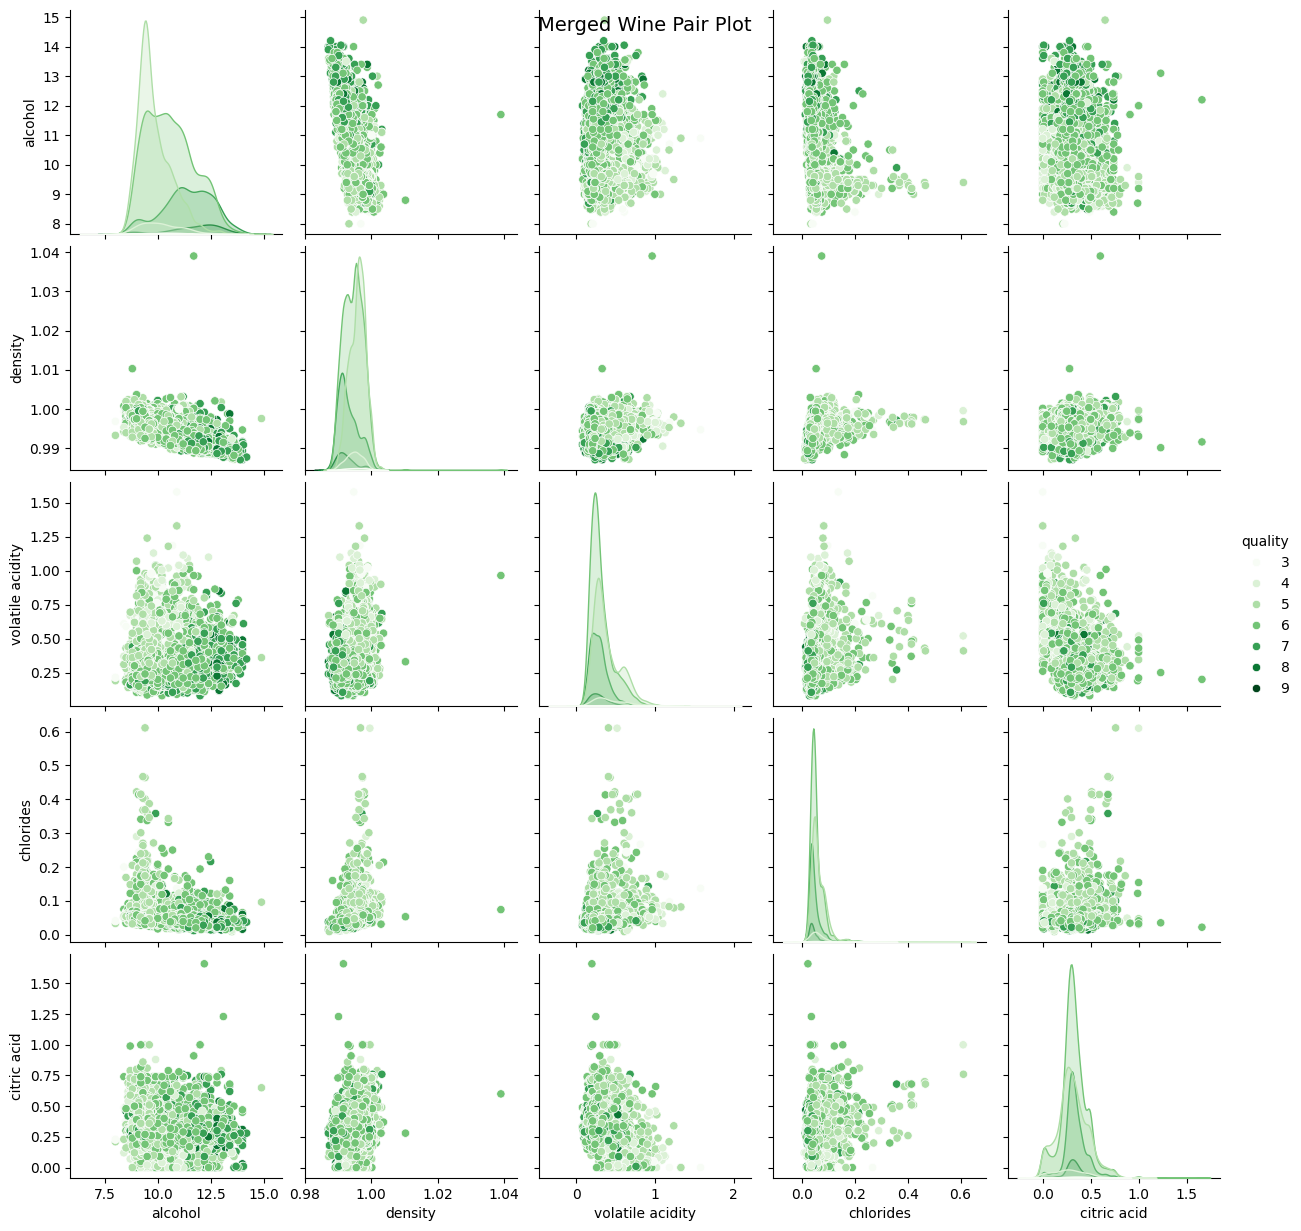

In [8]:
# Pair plots for selected features
# Select the top 5 features based on correlation with quality (both positive and negative)

red_selected_features = red_wine.corr()['quality'].abs().sort_values(ascending=False) # uses absolute values
sns.pairplot(red_wine[red_selected_features.index[:6]], hue='quality', palette='Reds')
plt.suptitle("Red Wine Pair Plot", fontsize=14)
plt.savefig("./figures/red_wine_pairplot.png")
plt.show()

white_selected_features = white_wine.corr()['quality'].abs().sort_values(ascending=False)
sns.pairplot(white_wine[white_selected_features.index[:6]], hue='quality', palette='Blues')
plt.suptitle("White Wine Pair Plot", fontsize=14)
plt.savefig("./figures/white_wine_pairplot.png")
plt.show()

merged_selected_features = merged_wine.corr()['quality'].abs().sort_values(ascending=False)
sns.pairplot(merged_wine[merged_selected_features.index[:6]], hue='quality', palette='Greens')
plt.suptitle("Merged Wine Pair Plot", fontsize=14)
plt.savefig("./figures/merged_wine_pairplot.png")
plt.show()
